https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_cancer = pd.read_csv("/content/drive/My Drive/DataMining/Dataset/LungCancer/CancerRegression.csv",encoding='latin-1')
df_cancer.head(5)

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
df_cancer.describe().T

count           mean            std           min  \
avgAnnCount              3047.0     606.338544    1416.356223      6.000000   
avgDeathsPerYear         3047.0     185.965868     504.134286      3.000000   
TARGET_deathRate         3047.0     178.664063      27.751511     59.700000   
incidenceRate            3047.0     448.268586      54.560733    201.300000   
medIncome                3047.0   47063.281917   12040.090836  22640.000000   
popEst2015               3047.0  102637.370528  329059.220504    827.000000   
povertyPercent           3047.0      16.878175       6.409087      3.200000   
studyPerCap              3047.0     155.399415     529.628366      0.000000   
MedianAge                3047.0      45.272333      45.304480     22.300000   
MedianAgeMale            3047.0      39.570725       5.226017     22.400000   
MedianAgeFemale          3047.0      42.145323       5.292849     22.300000   
AvgHouseholdSize         3047.0       2.479662       0.429174      0.022100   
PercentMarried           3047.0      51.773679       6.896928     23.100000   
PctNoHS18_24             3047.0      18.224450       8.093064      0.000000   
PctHS18_24               3047.0      35.002068       9.069722      0.000000   
PctSomeCol18_24           762.0      40.977034      11.115805      7.100000   
PctBachDeg18_24          3047.0       6.158287       4.529059      0.000000   
PctHS25_Over             3047.0      34.804660       7.034924      7.500000   
PctBachDeg25_Over        3047.0      13.282015       5.394756      2.500000   
PctEmployed16_Over       2895.0      54.152642       8.315064     17.600000   
PctUnemployed16_Over     3047.0       7.852412       3.452371      0.400000   
PctPrivateCoverage       3047.0      64.354939      10.647057     22.300000   
PctPrivateCoverageAlone  2438.0      48.453774      10.083006     15.700000   
PctEmpPrivCoverage       3047.0      41.196324       9.447687     13.500000   
PctPublicCoverage        3047.0      36.252642       7.841741     11.200000   
PctPublicCoverageAlone   3047.0      19.240072       6.113041      2.600000   
PctWhite                 3047.0      83.645286      16.380025     10.199155   
PctBlack                 3047.0       9.107978      14.534538      0.000000   
PctAsian                 3047.0       1.253965       2.610276      0.000000   
PctOtherRace             3047.0       1.983523       3.517710      0.000000   
PctMarriedHouseholds     3047.0      51.243872       6.572814     22.992490   
BirthRate                3047.0       5.640306       1.985816      0.000000   

                                  25%           50%           75%  \
avgAnnCount                 76.000000    171.000000    518.000000   
avgDeathsPerYear            28.000000     61.000000    149.000000   
TARGET_deathRate           161.200000    178.100000    195.200000   
incidenceRate              420.300000    453.549422    480.850000   
medIncome                38882.500000  45207.000000  52492.000000   
popEst2015               11684.000000  26643.000000  68671.000000   
povertyPercent              12.150000     15.900000     20.400000   
studyPerCap                  0.000000      0.000000     83.650776   
MedianAge                   37.700000     41.000000     44.000000   
MedianAgeMale               36.350000     39.600000     42.500000   
MedianAgeFemale             39.100000     42.400000     45.300000   
AvgHouseholdSize             2.370000      2.500000      2.630000   
PercentMarried              47.750000     52.400000     56.400000   
PctNoHS18_24                12.800000     17.100000     22.700000   
PctHS18_24                  29.200000     34.700000     40.700000   
PctSomeCol18_24             34.000000     40.400000     46.400000   
PctBachDeg18_24              3.100000      5.400000      8.200000   
PctHS25_Over                30.400000     35.300000     39.650000   
PctBachDeg25_Over            9.400000     12.300000     16.100000   
PctEmployed16_Over          48.600000 

In [7]:
df_cancer.describe(include="object").T

count unique                        top freq
binnedInc  3047     10         (54545.6, 61494.5]  306
Geography  3047   3047  Kitsap County, Washington    1

In [8]:
dup_data = df_cancer[df_cancer.duplicated()] 
dup_data.shape

(0, 34)

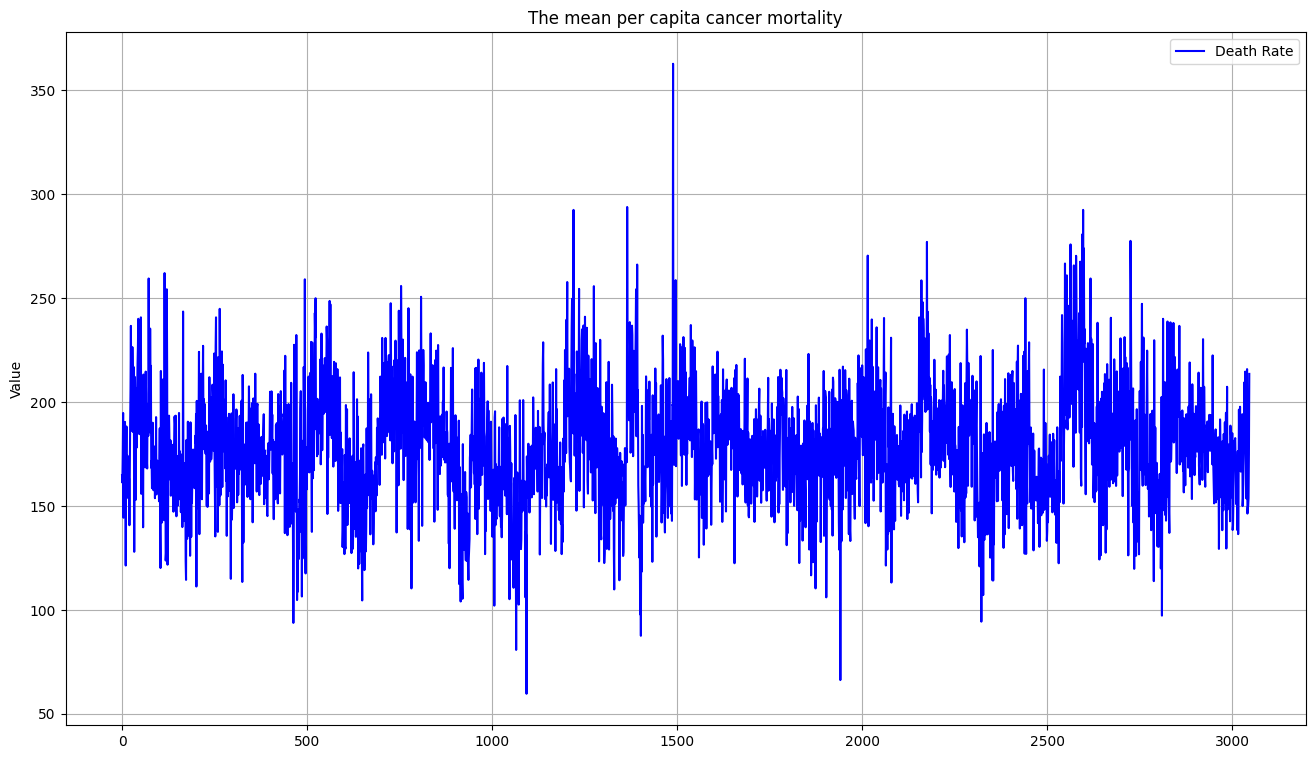

In [9]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("The mean per capita cancer mortality")
# plt.xlabel('Dates')
plt.ylabel('Value')
plt.plot(df_cancer["TARGET_deathRate"], 'blue', label='Death Rate')
plt.legend()

In [10]:
#Check null
total = df_cancer.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df_cancer.isnull().sum()/df_cancer.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data

Total     %
PctSomeCol18_24           2285  75.0
PctPrivateCoverageAlone    609  20.0
PctEmployed16_Over         152   5.0
PctEmpPrivCoverage           0   0.0
PctHS25_Over                 0   0.0
PctBachDeg25_Over            0   0.0
PctUnemployed16_Over         0   0.0
PctPrivateCoverage           0   0.0
PctPublicCoverage            0   0.0
avgDeathsPerYear             0   0.0
PctPublicCoverageAlone       0   0.0
PctWhite                     0   0.0
PctBlack                     0   0.0
PctAsian                     0   0.0
PctOtherRace                 0   0.0
PctMarriedHouseholds         0   0.0
PctBachDeg18_24              0   0.0
avgAnnCount                  0   0.0
PctHS18_24                   0   0.0
PctNoHS18_24                 0   0.0
PercentMarried               0   0.0
AvgHouseholdSize             0   0.0
Geography                    0   0.0
MedianAgeFemale              0   0.0
MedianAgeMale                0   0.0
MedianAge                    0   0.0
binnedInc                    0   0.0
studyPerCap                  0   0.0
povertyPercent               0   0.0
popEst2015                   0   0.0
medIncome                    0   0.0
incidenceRate                0   0.0
TARGET_deathRate             0   0.0
BirthRate                    0   0.0

In [11]:
missing_data = missing_data.reset_index()

In [12]:
arr_missing_data = []
for index, row in missing_data.iterrows():
  if row['Total'] != 0:
    arr_missing_data.append(row['index'])

In [13]:
numerical = []
for num in df_cancer.columns:
    if df_cancer[num].dtype !="O":
            numerical.append(num)
print(numerical)

['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [14]:
dict_missing_data = {}
count = 1
for num in arr_missing_data:
  dict_missing_data[num] = count
  count = count + 1
print(dict_missing_data)

{'PctSomeCol18_24': 1, 'PctPrivateCoverageAlone': 2, 'PctEmployed16_Over': 3}


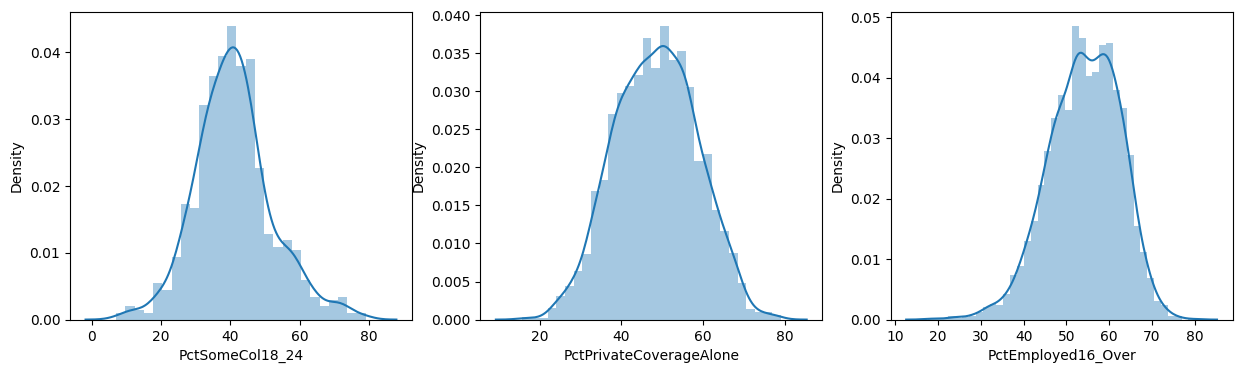

In [15]:
plt.figure(figsize=(15,4))

for variable,i in dict_missing_data.items():
  plt.subplot(1,3,i)
  sns.distplot(df_cancer[variable], label="skew: " + str(np.round(df_cancer[variable].skew(),2)))

plt.show()

In [16]:
for i in arr_missing_data:
  df_cancer[i].fillna(df_cancer[i].mean(), inplace = True)

In [17]:
#Check null
total = df_cancer.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df_cancer.isnull().sum()/df_cancer.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

Total    %
avgAnnCount             0  0.0
PctEmpPrivCoverage      0  0.0
PctHS25_Over            0  0.0
PctBachDeg25_Over       0  0.0
PctEmployed16_Over      0  0.0

In [18]:
col_dict = {}
count = 1
for num in numerical:
  col_dict[num] = count
  count = count + 1
print(col_dict)

{'avgAnnCount': 1, 'avgDeathsPerYear': 2, 'TARGET_deathRate': 3, 'incidenceRate': 4, 'medIncome': 5, 'popEst2015': 6, 'povertyPercent': 7, 'studyPerCap': 8, 'MedianAge': 9, 'MedianAgeMale': 10, 'MedianAgeFemale': 11, 'AvgHouseholdSize': 12, 'PercentMarried': 13, 'PctNoHS18_24': 14, 'PctHS18_24': 15, 'PctSomeCol18_24': 16, 'PctBachDeg18_24': 17, 'PctHS25_Over': 18, 'PctBachDeg25_Over': 19, 'PctEmployed16_Over': 20, 'PctUnemployed16_Over': 21, 'PctPrivateCoverage': 22, 'PctPrivateCoverageAlone': 23, 'PctEmpPrivCoverage': 24, 'PctPublicCoverage': 25, 'PctPublicCoverageAlone': 26, 'PctWhite': 27, 'PctBlack': 28, 'PctAsian': 29, 'PctOtherRace': 30, 'PctMarriedHouseholds': 31, 'BirthRate': 32}


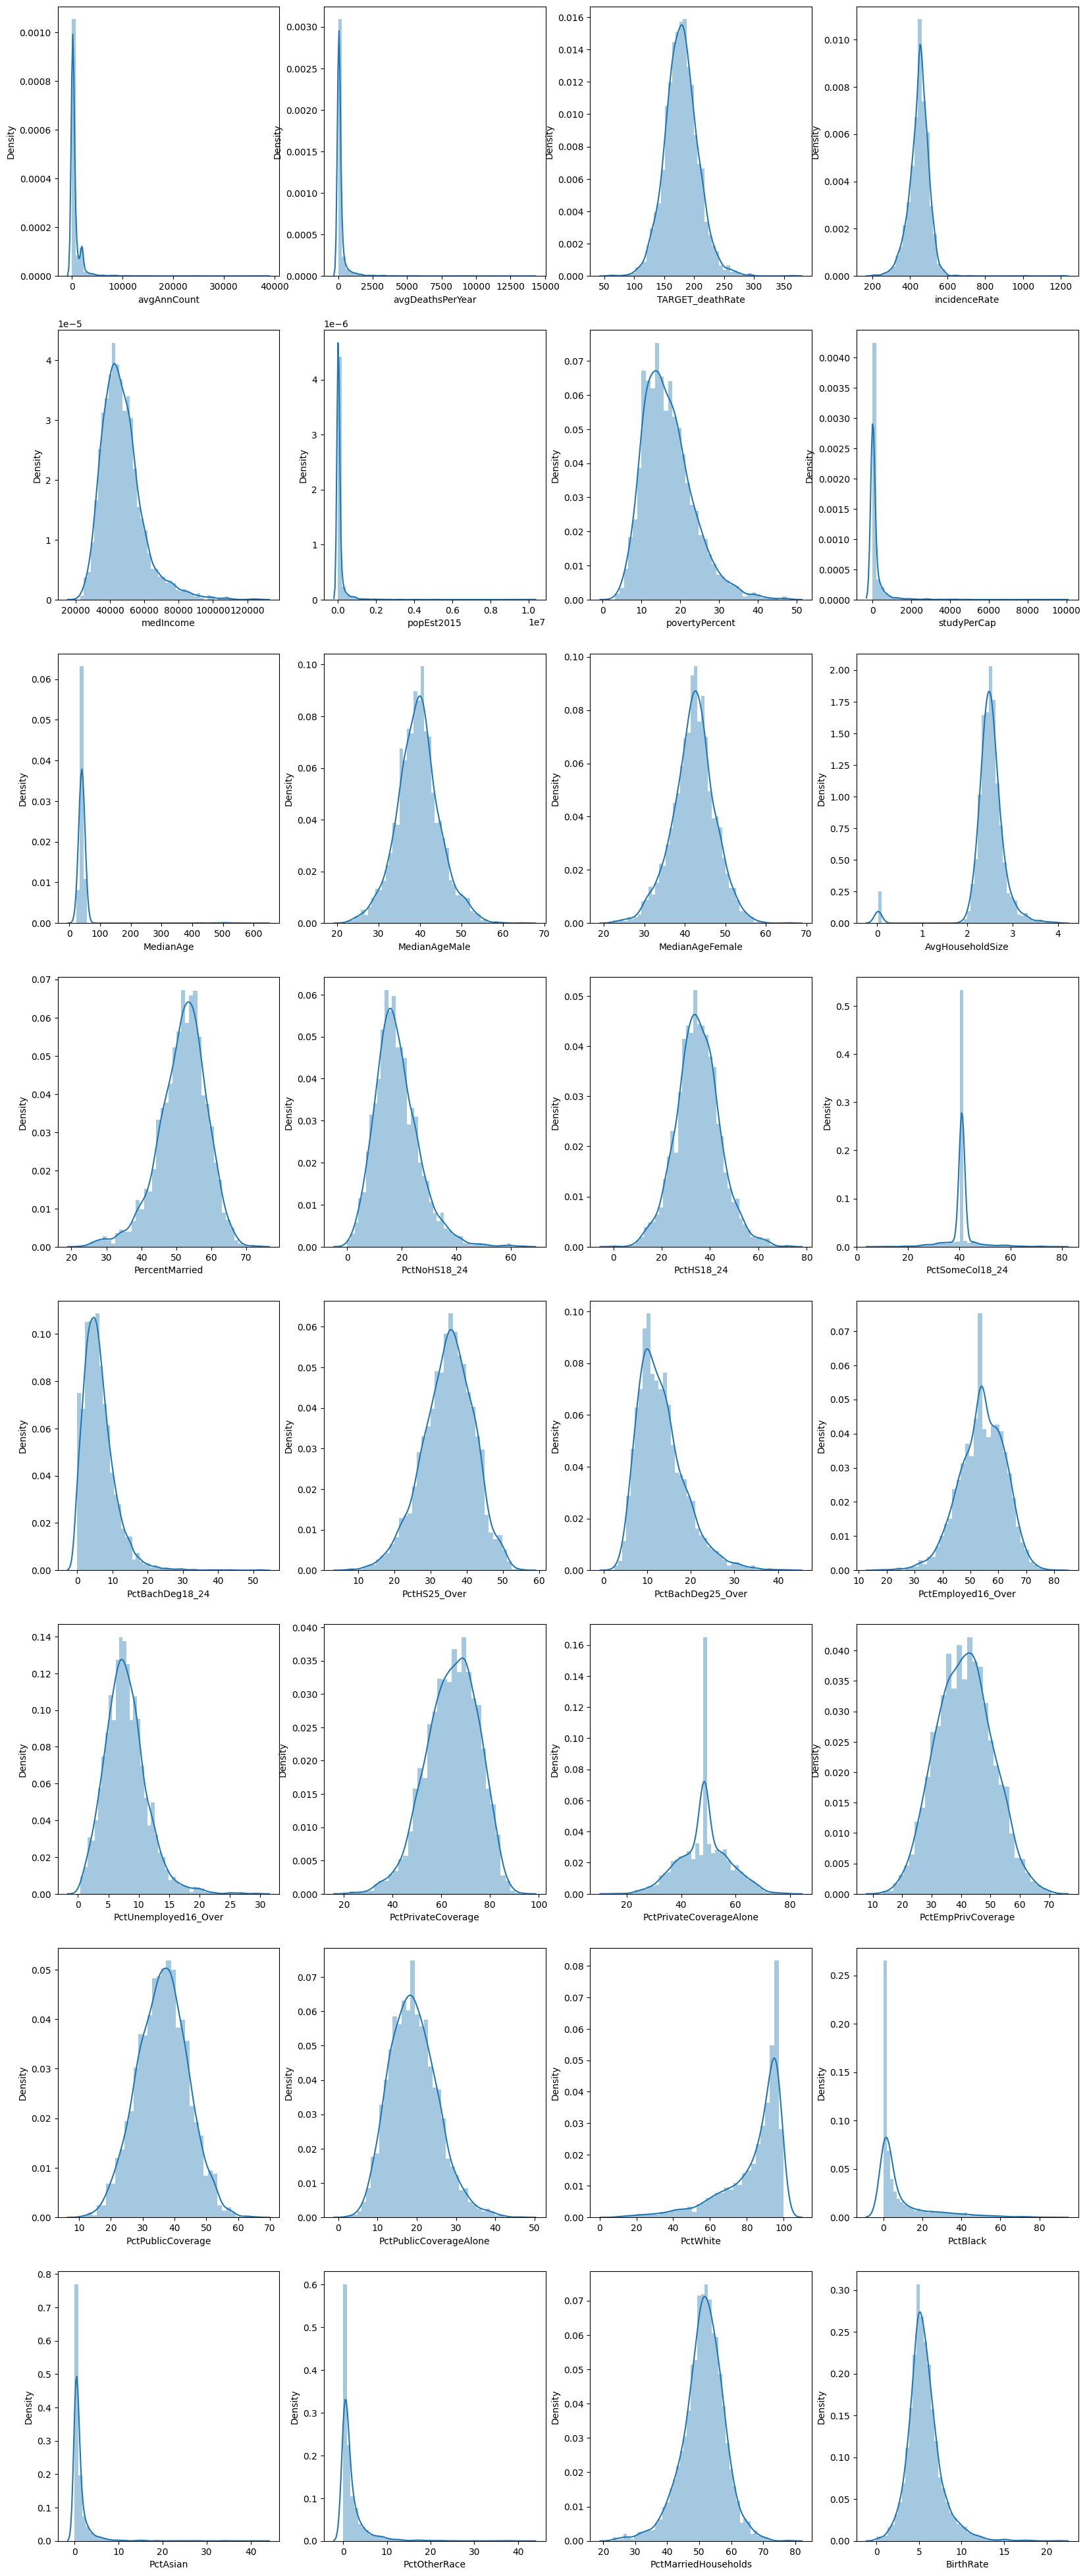

In [19]:
plt.figure(figsize=(20,50))

for variable,i in col_dict.items():
  plt.subplot(8,4,i)
  sns.distplot(df_cancer[variable], label="skew: " + str(np.round(df_cancer[variable].skew(),2)))

plt.show()

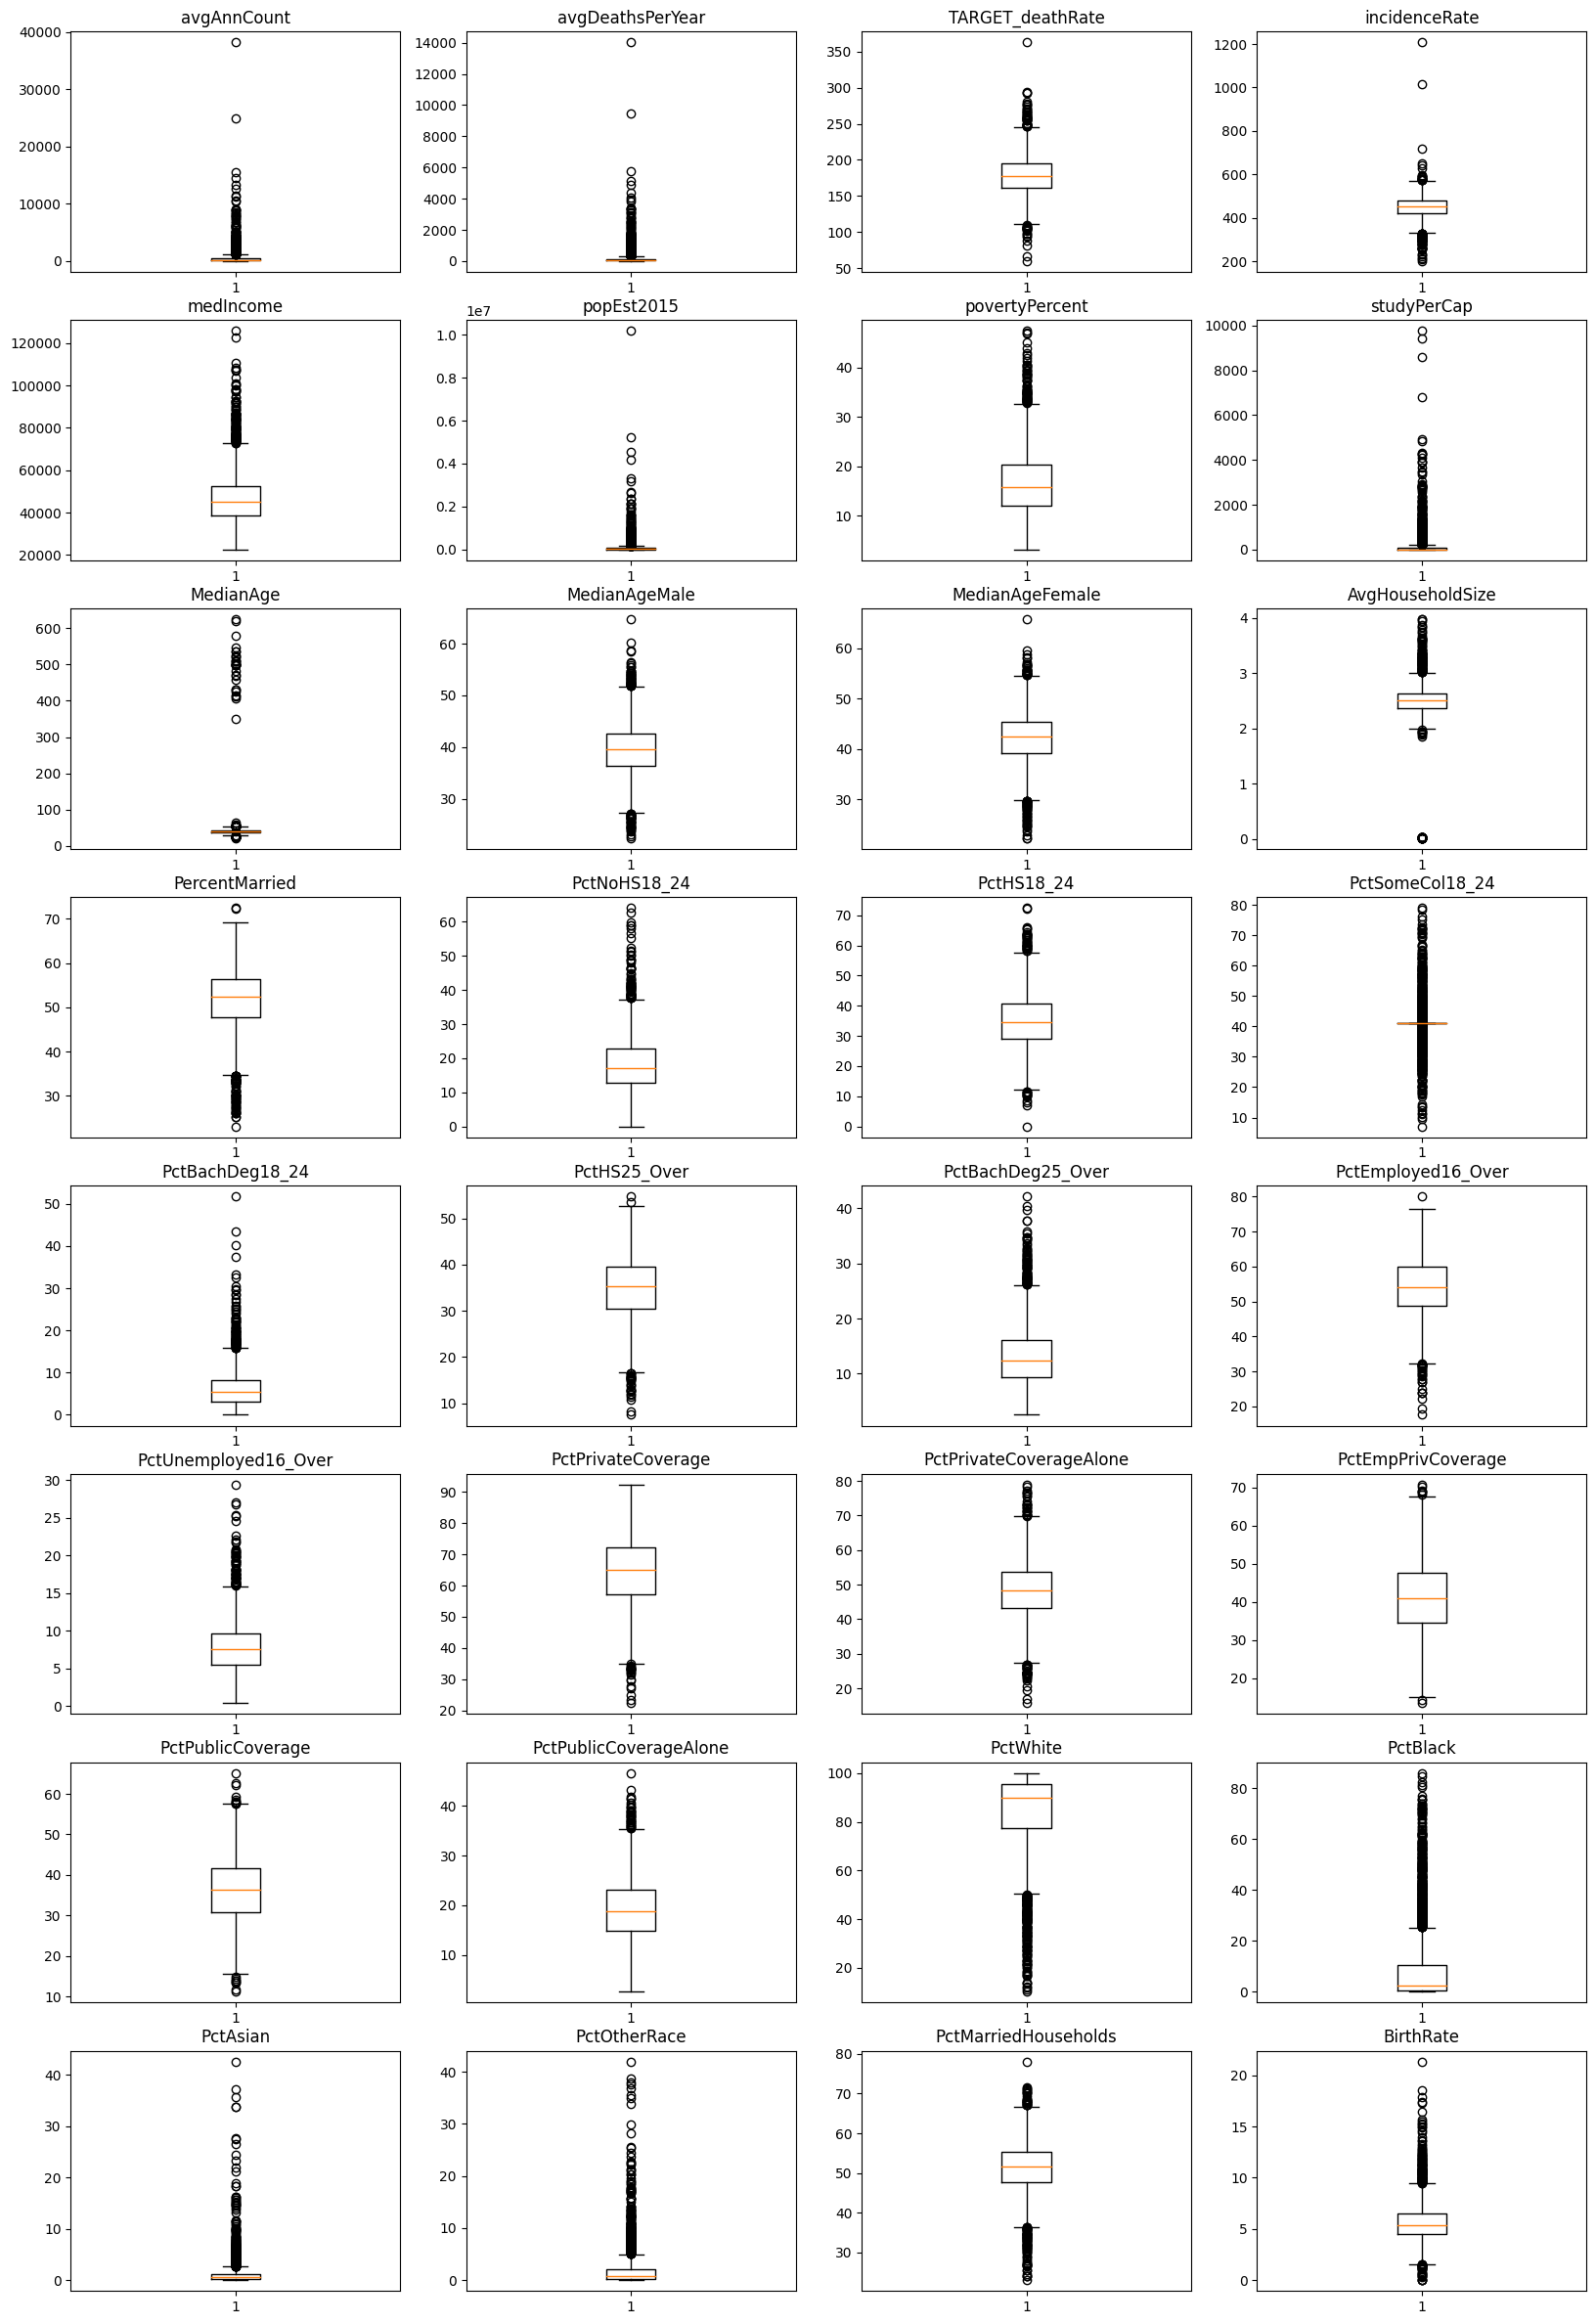

In [20]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
  plt.subplot(8,4,i)
  plt.boxplot(df_cancer[variable])
  plt.title(variable)

plt.show()

In [21]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(df_cancer[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df_cancer[variable] > max_val) | 
                                                                                           (df_cancer[variable] < min_val))[0])),len((np.where((df_cancer[variable] > max_val) | 
                                                                                           (df_cancer[variable] < min_val))[0]))*100/len(df_cancer)))

Number of outliers and percentage of it in avgAnnCount : 461 and 15.129635707253035
Number of outliers and percentage of it in avgDeathsPerYear : 349 and 11.45388907121759
Number of outliers and percentage of it in TARGET_deathRate : 64 and 2.1004266491631114
Number of outliers and percentage of it in incidenceRate : 93 and 3.052182474565146
Number of outliers and percentage of it in medIncome : 122 and 4.003938299967181
Number of outliers and percentage of it in popEst2015 : 412 and 13.521496553987529
Number of outliers and percentage of it in povertyPercent : 69 and 2.2645224811289792
Number of outliers and percentage of it in studyPerCap : 504 and 16.5408598621595
Number of outliers and percentage of it in MedianAge : 93 and 3.052182474565146
Number of outliers and percentage of it in MedianAgeMale : 89 and 2.9209058089924516
Number of outliers and percentage of it in MedianAgeFemale : 78 and 2.559894978667542
Number of outliers and percentage of it in AvgHouseholdSize : 201 and 6.5

In [22]:
# Importing train_test_split
X = df_cancer.drop(['TARGET_deathRate'], axis = 1)
y = df_cancer['TARGET_deathRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2742, 33), (305, 33), (2742,), (305,))

In [23]:
for i in X_train.select_dtypes(include=['float64','int64']):
    q1 = X_train[i].quantile(0.25)                 
    q3 = X_train[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_train = X_train[(X_train[i] < q1 - whisker_width*iqr) | (X_train[i] > q3 + whisker_width*iqr)]
    X_train.loc[X_train[i]>upper_whisker,i] = upper_whisker

In [24]:
for i in X_test.select_dtypes(include=['float64','int64']):
    q1 = X_test[i].quantile(0.25)                 
    q3 = X_test[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = X_test[(X_test[i] < q1 - whisker_width*iqr) | (X_test[i] > q3 + whisker_width*iqr)]
    X_test.loc[X_test[i]>upper_whisker,i] = upper_whisker

In [25]:
trainset = pd.merge(X_train, y_train, left_index=True, right_index=True)
testset = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [26]:
col_dict = {}
count = 1
for num in numerical:
  col_dict[num] = count
  count = count + 1
print(col_dict)

{'avgAnnCount': 1, 'avgDeathsPerYear': 2, 'TARGET_deathRate': 3, 'incidenceRate': 4, 'medIncome': 5, 'popEst2015': 6, 'povertyPercent': 7, 'studyPerCap': 8, 'MedianAge': 9, 'MedianAgeMale': 10, 'MedianAgeFemale': 11, 'AvgHouseholdSize': 12, 'PercentMarried': 13, 'PctNoHS18_24': 14, 'PctHS18_24': 15, 'PctSomeCol18_24': 16, 'PctBachDeg18_24': 17, 'PctHS25_Over': 18, 'PctBachDeg25_Over': 19, 'PctEmployed16_Over': 20, 'PctUnemployed16_Over': 21, 'PctPrivateCoverage': 22, 'PctPrivateCoverageAlone': 23, 'PctEmpPrivCoverage': 24, 'PctPublicCoverage': 25, 'PctPublicCoverageAlone': 26, 'PctWhite': 27, 'PctBlack': 28, 'PctAsian': 29, 'PctOtherRace': 30, 'PctMarriedHouseholds': 31, 'BirthRate': 32}


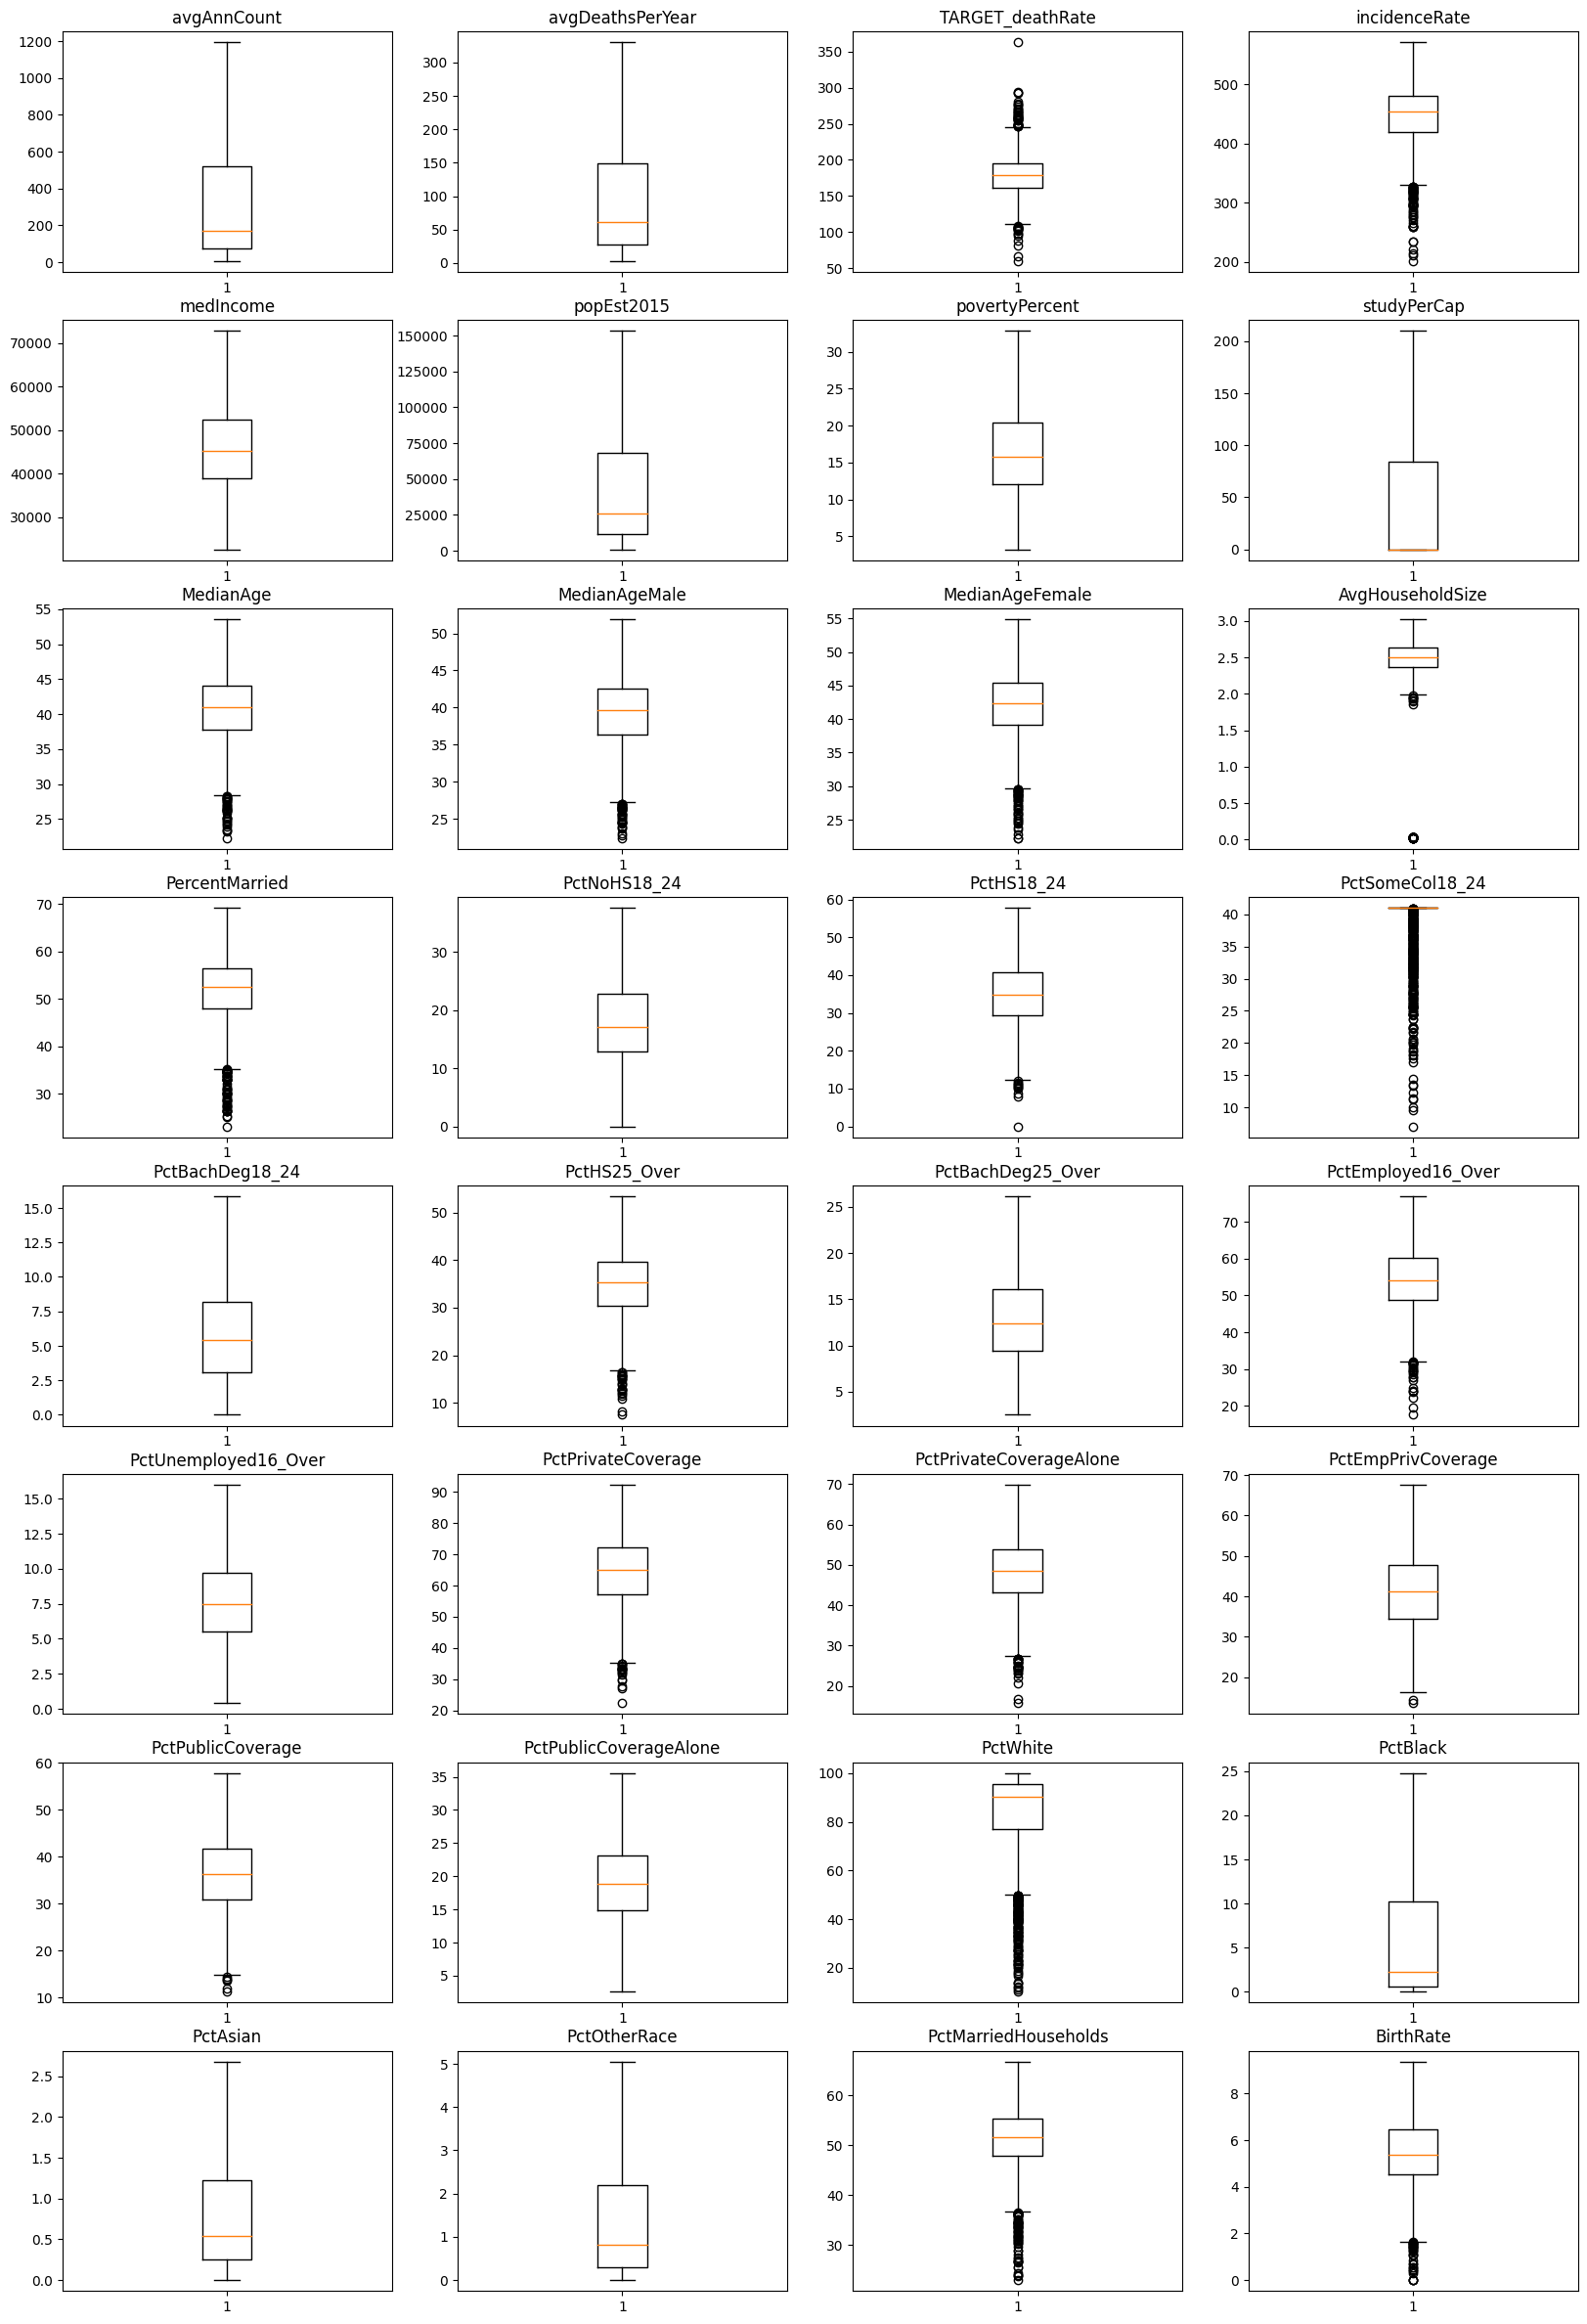

In [27]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
  plt.subplot(8,4,i)
  plt.boxplot(trainset[variable])
  plt.title(variable)

plt.show()

In [28]:
numerical_train = []
for num in trainset.columns:
    if df_cancer[num].dtype !="O" and num != 'TARGET_deathRate':
            numerical_train.append(num)
print(numerical_train)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [29]:
col_dict_train = {}
count = 1
for num in numerical_train:
  col_dict_train[num] = count
  count = count + 1
print(col_dict_train)

{'avgAnnCount': 1, 'avgDeathsPerYear': 2, 'incidenceRate': 3, 'medIncome': 4, 'popEst2015': 5, 'povertyPercent': 6, 'studyPerCap': 7, 'MedianAge': 8, 'MedianAgeMale': 9, 'MedianAgeFemale': 10, 'AvgHouseholdSize': 11, 'PercentMarried': 12, 'PctNoHS18_24': 13, 'PctHS18_24': 14, 'PctSomeCol18_24': 15, 'PctBachDeg18_24': 16, 'PctHS25_Over': 17, 'PctBachDeg25_Over': 18, 'PctEmployed16_Over': 19, 'PctUnemployed16_Over': 20, 'PctPrivateCoverage': 21, 'PctPrivateCoverageAlone': 22, 'PctEmpPrivCoverage': 23, 'PctPublicCoverage': 24, 'PctPublicCoverageAlone': 25, 'PctWhite': 26, 'PctBlack': 27, 'PctAsian': 28, 'PctOtherRace': 29, 'PctMarriedHouseholds': 30, 'BirthRate': 31}


In [30]:
df_train_features = trainset.iloc[:,:trainset.shape[1]-1][numerical_train]
df_train_label = trainset.iloc[:, [trainset.shape[1]-1]]
df_test_features = testset.iloc[:,:testset.shape[1]-1][numerical_train]
df_test_label = testset.iloc[:, [testset.shape[1]-1]]

In [31]:
from sklearn import preprocessing
scaler =preprocessing.MinMaxScaler()
scaler_single =preprocessing.MinMaxScaler()

In [32]:
min_max_train = np.concatenate([scaler.fit_transform(df_train_features), scaler_single.fit_transform(df_train_label)], axis = 1)
min_max_test = np.concatenate([scaler.transform(df_test_features), scaler_single.transform(df_test_label)], axis = 1)

In [33]:
df_min_max_train = pd.DataFrame(min_max_train)
df_min_max_test = pd.DataFrame(min_max_test)

In [34]:
df_min_max_train.columns = numerical
df_min_max_test.columns = numerical

In [35]:
df_min_max_train.index = trainset.index
df_min_max_test.index = testset.index

In [36]:
for col in numerical:
  trainset.loc[(trainset.index==df_min_max_train.index), col]=df_min_max_train[col]
  testset.loc[(testset.index==df_min_max_test.index), col]=df_min_max_test[col]

In [69]:
import joblib
scaler_filename = "/content/drive/My Drive/DataMining/POC/LungCancer/Model/Scaler/scaler.save"
joblib.dump(scaler, scaler_filename) 
scaler_single_filename = "/content/drive/My Drive/DataMining/POC/LungCancer/Model/Scaler/scaler_single.save"
joblib.dump(scaler_single, scaler_single_filename) 

['/content/drive/My Drive/DataMining/POC/LungCancer/Model/Scaler/scaler_single.save']

In [38]:
categorical = []
for num in df_cancer.columns:
    if df_cancer[num].dtype =="O":
            categorical.append(num)
print(categorical)

['binnedInc', 'Geography']


In [39]:
for cat in categorical:
    print(f"-------------------------------------{cat}-------------------------------------")
    print(df_cancer[cat].unique())

-------------------------------------binnedInc-------------------------------------
['(61494.5, 125635]' '(48021.6, 51046.4]' '(42724.4, 45201]'
 '(51046.4, 54545.6]' '(37413.8, 40362.7]' '(40362.7, 42724.4]'
 '(54545.6, 61494.5]' '(34218.1, 37413.8]' '[22640, 34218.1]'
 '(45201, 48021.6]']
-------------------------------------Geography-------------------------------------
['Kitsap County, Washington' 'Kittitas County, Washington'
 'Klickitat County, Washington' ... 'Ford County, Kansas'
 'Franklin County, Kansas' 'Geary County, Kansas']




*   The Geography become the index of this dataset
*   Convert the numerical values in the binnedInc to the catogerical values





In [40]:
x = 'Lincoln County, Arkansas'
x.split(", ")[1]

'Arkansas'

In [41]:
trainset["City"] = trainset['Geography'].apply(lambda x: x.split(", ")[0])
trainset["State"] = trainset['Geography'].apply(lambda x: x.split(", ")[1])
testset["City"] = testset['Geography'].apply(lambda x: x.split(", ")[0])
testset["State"] = testset['Geography'].apply(lambda x: x.split(", ")[1])

In [42]:
df_region = pd.read_csv("/content/drive/My Drive/DataMining/Dataset/LungCancer/states.csv",encoding='latin-1')
df_region.head(5)

State State Code Region            Division
0      Alaska         AK   West             Pacific
1     Alabama         AL  South  East South Central
2    Arkansas         AR  South  West South Central
3     Arizona         AZ   West            Mountain
4  California         CA   West             Pacific

In [43]:
trainset = trainset.merge(df_region[['State', 'Region', 'Division']], on = 'State', how = 'left')
testset = testset.merge(df_region[['State', 'Region', 'Division']], on = 'State', how = 'left')

In [44]:
trainset['binnedInc'] = trainset['binnedInc'].astype('category').cat.codes
testset['binnedInc'] = testset['binnedInc'].astype('category').cat.codes
trainset['State'] = trainset['State'].astype('category').cat.codes
testset['State'] = testset['State'].astype('category').cat.codes
trainset['Region'] = trainset['Region'].astype('category').cat.codes
testset['Region'] = testset['Region'].astype('category').cat.codes
trainset['Division'] = trainset['Division'].astype('category').cat.codes
testset['Division'] = testset['Division'].astype('category').cat.codes
trainset['City'] = trainset['City'].astype('category').cat.codes
testset['City'] = testset['City'].astype('category').cat.codes

In [45]:
trainset = trainset.set_index('Geography')
testset = testset.set_index('Geography')

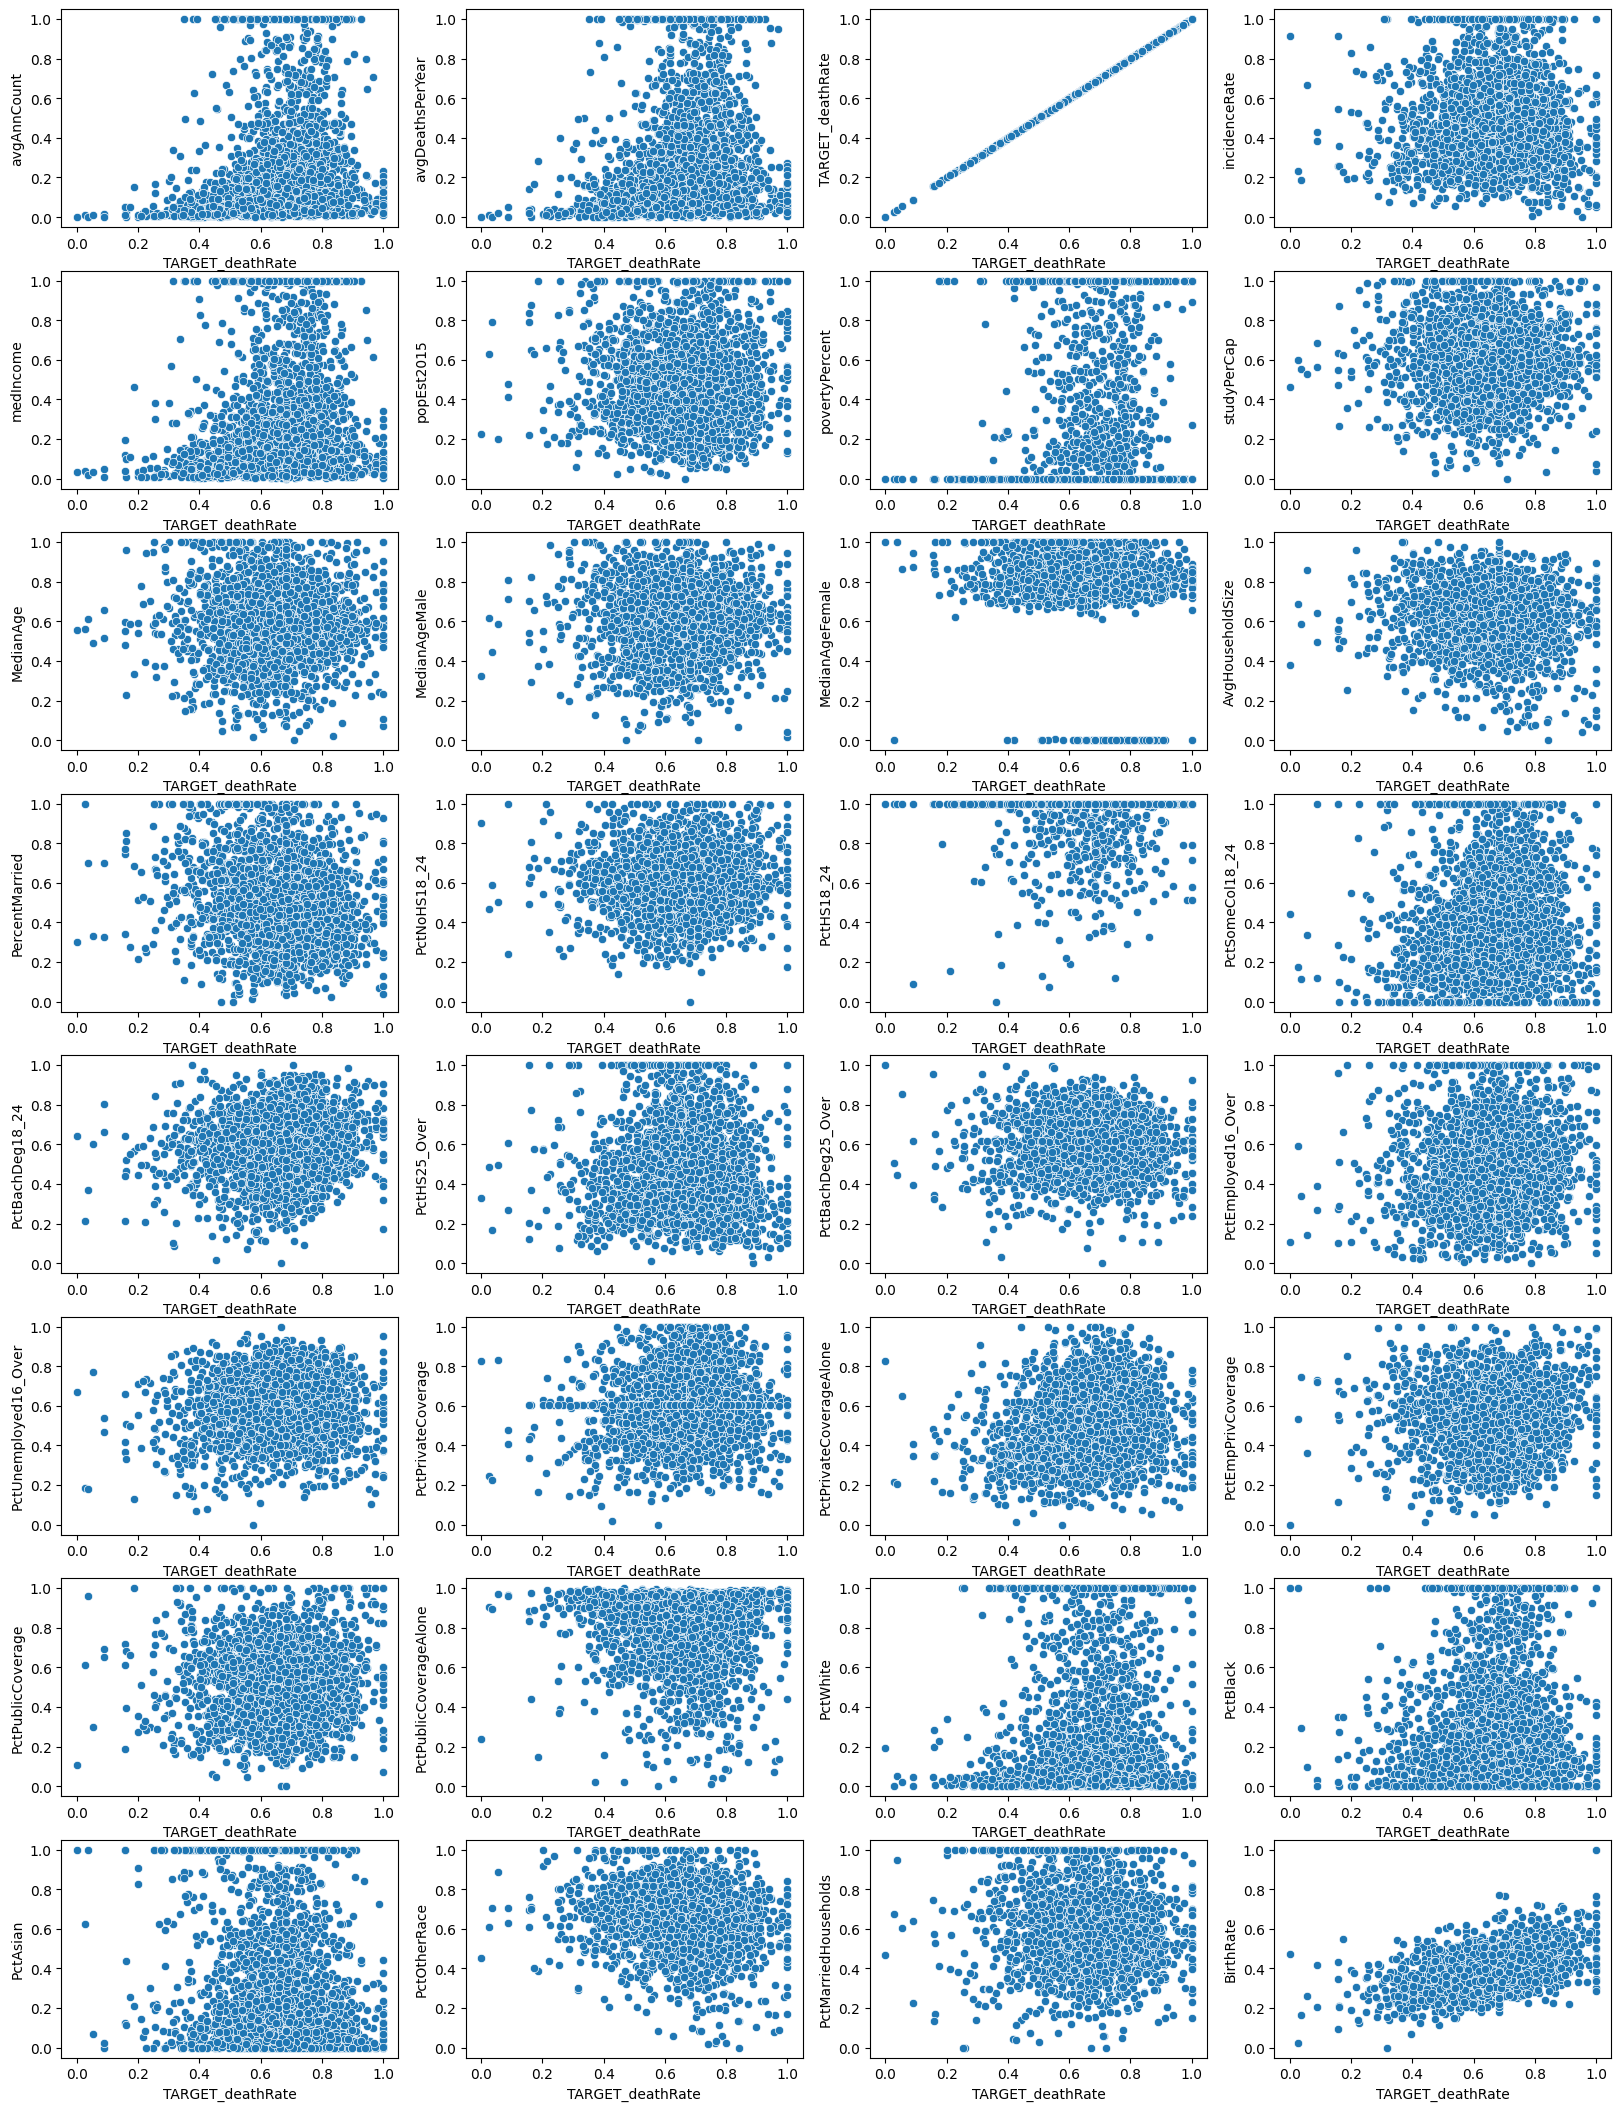

In [46]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
  plt.subplot(9,4,i)
  sns.scatterplot(x="TARGET_deathRate",y=variable,data=trainset)

plt.show()

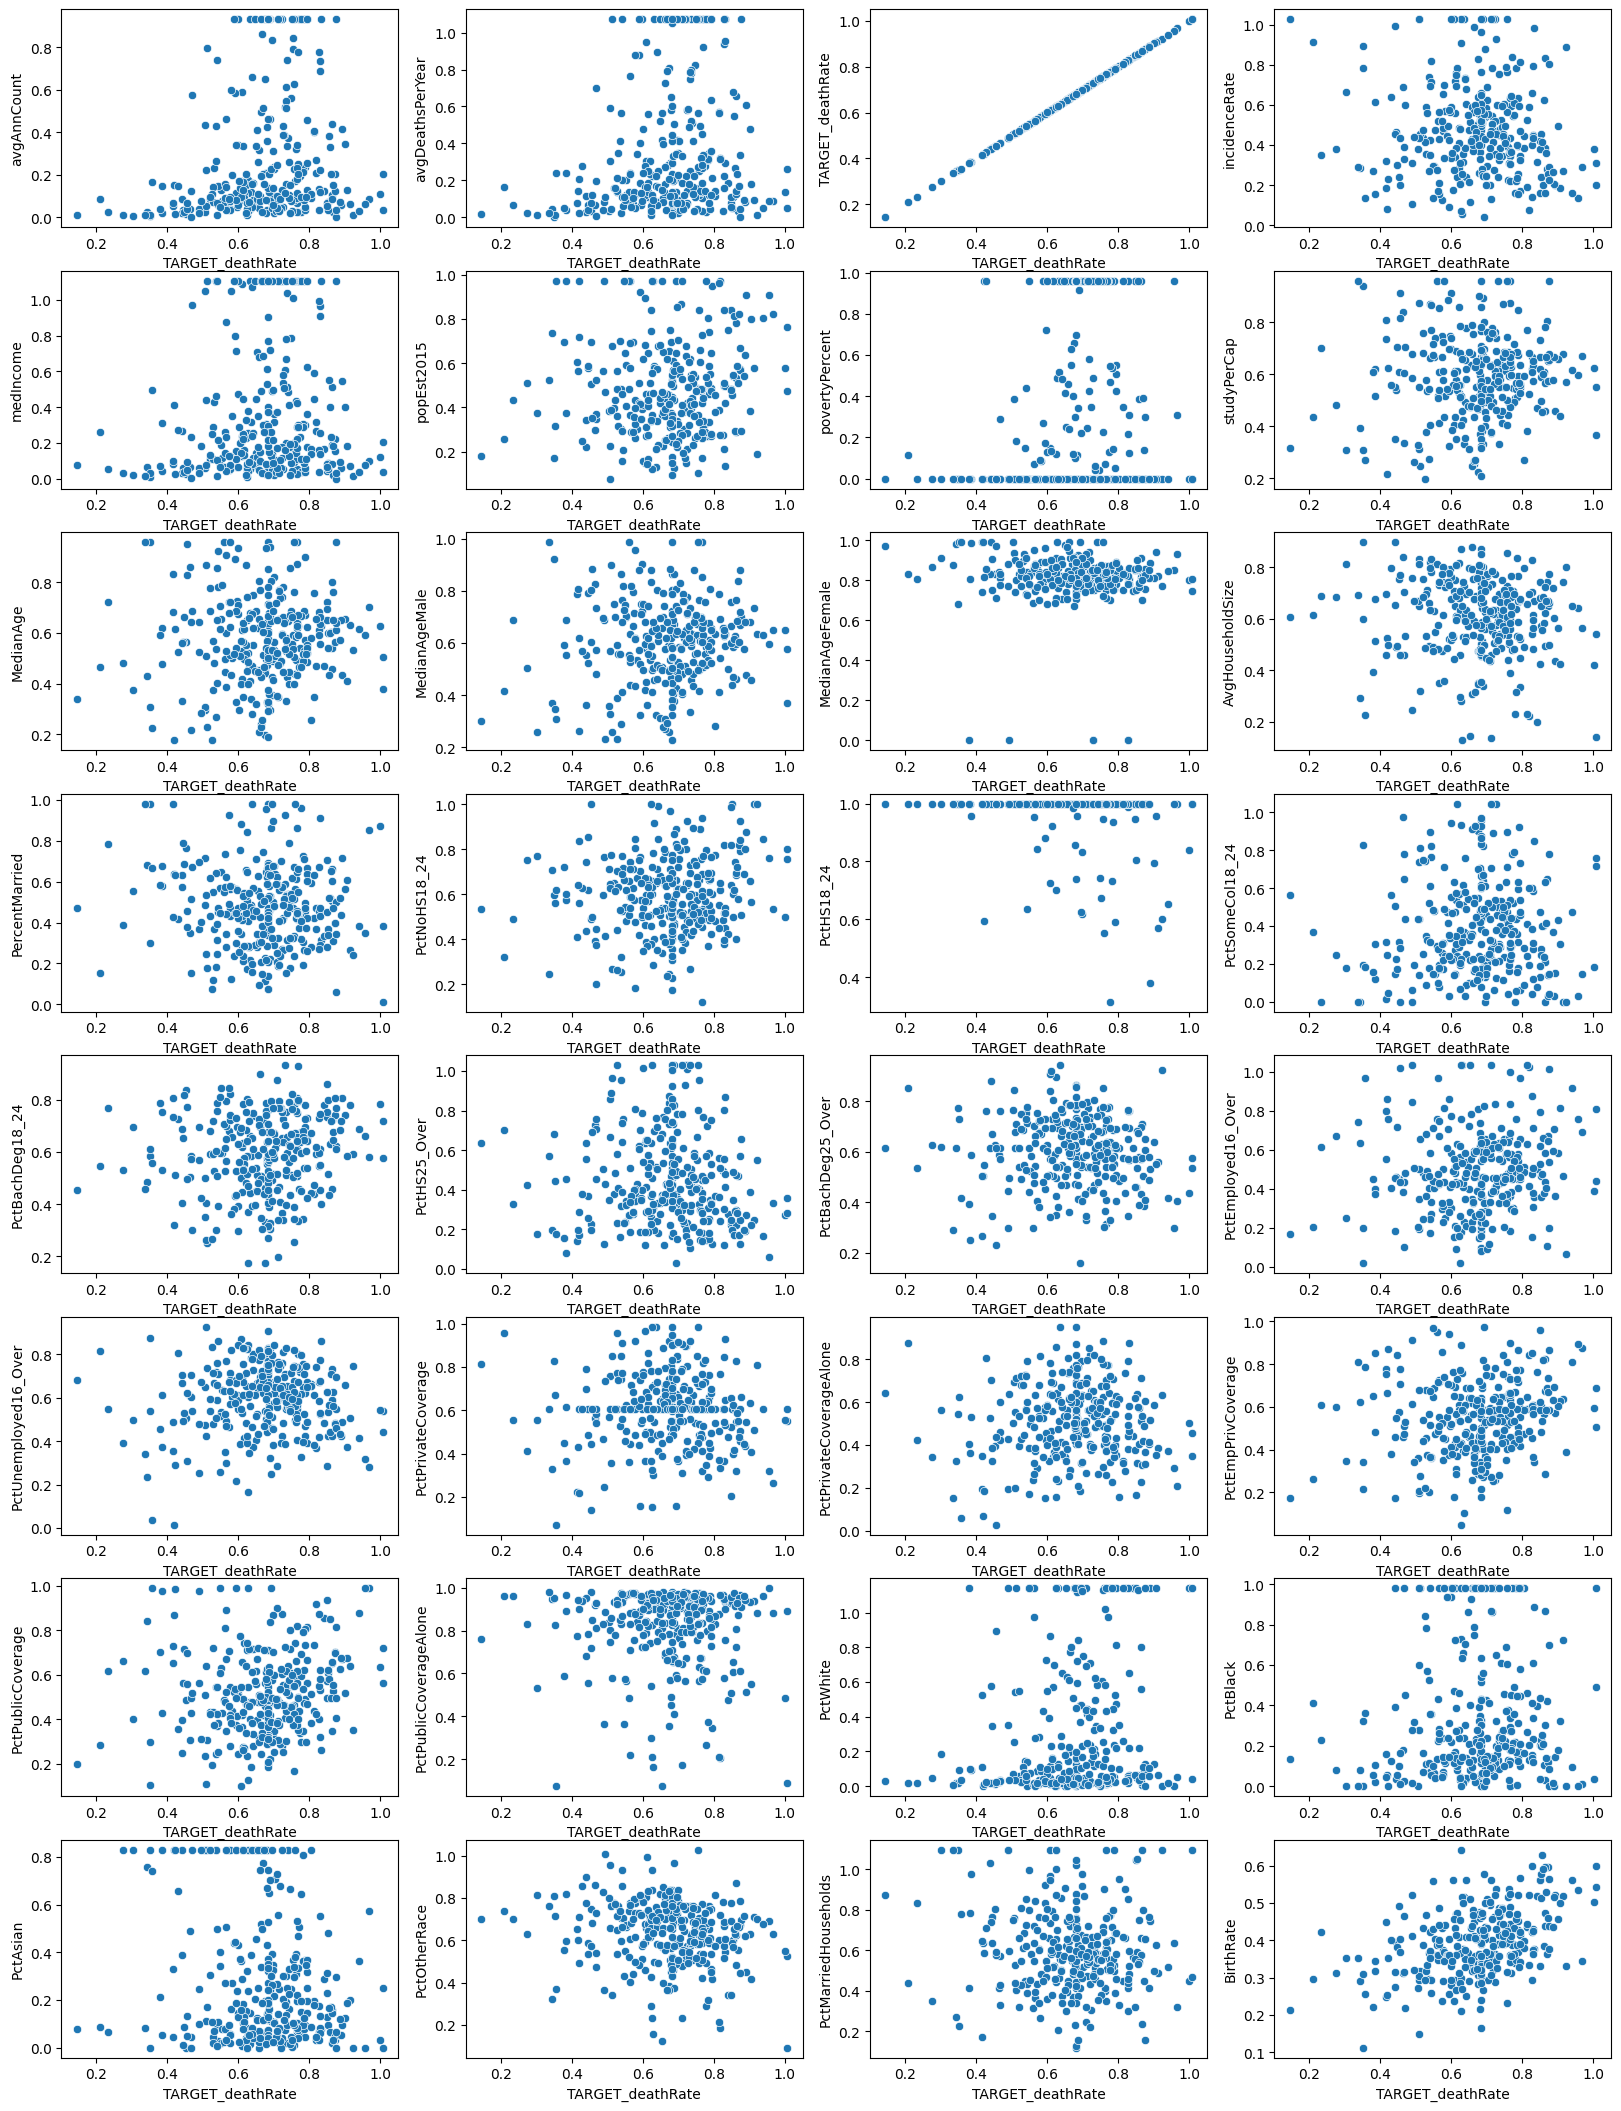

In [47]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
  plt.subplot(9,4,i)
  sns.scatterplot(x="TARGET_deathRate",y=variable,data=testset)

plt.show()

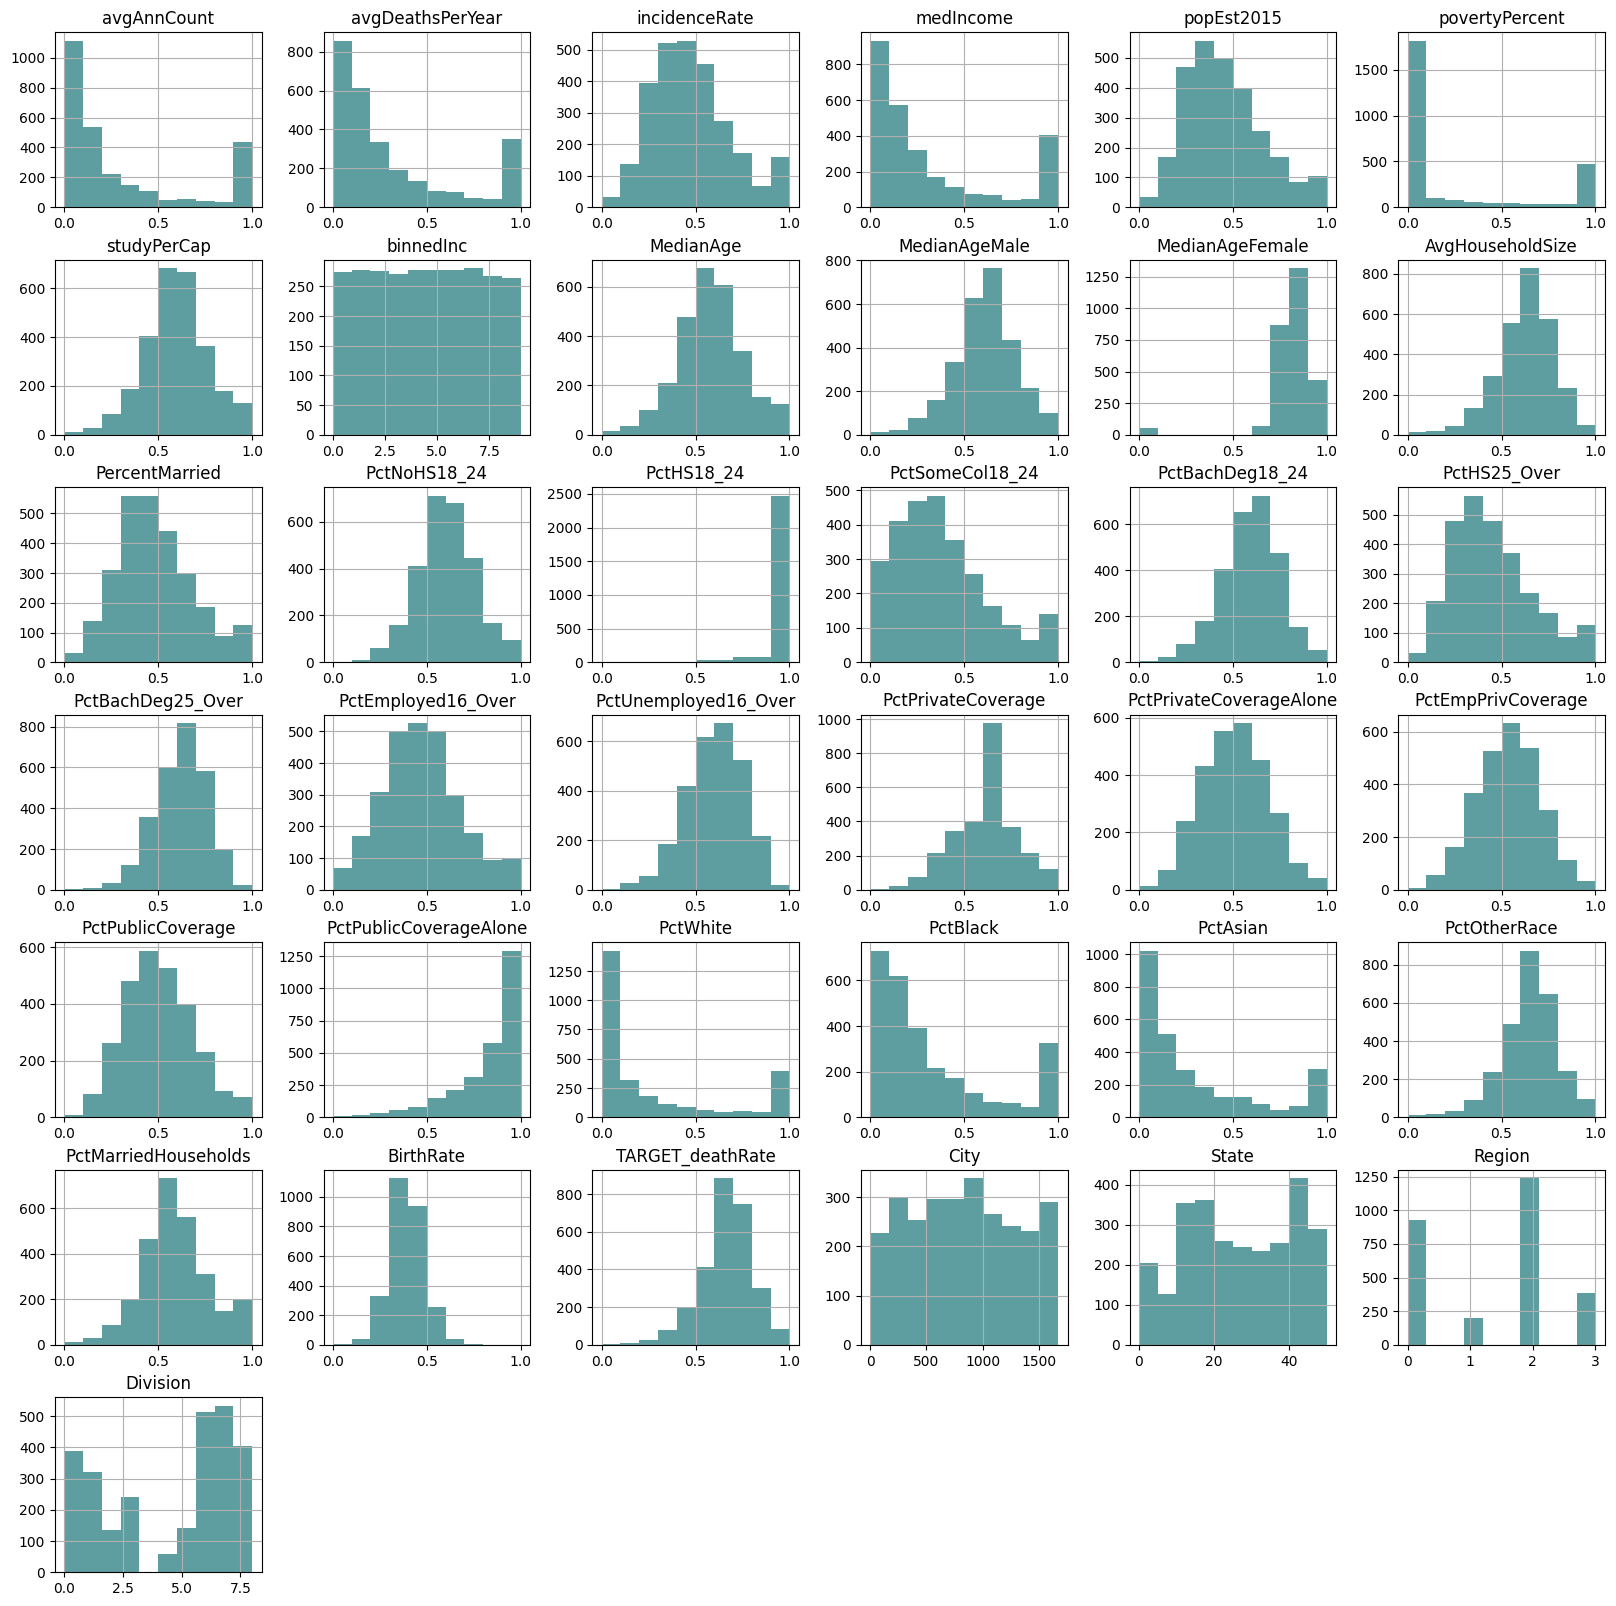

In [48]:
data_hist_plot = trainset.hist(figsize = (20,20), color = "#5F9EA0")

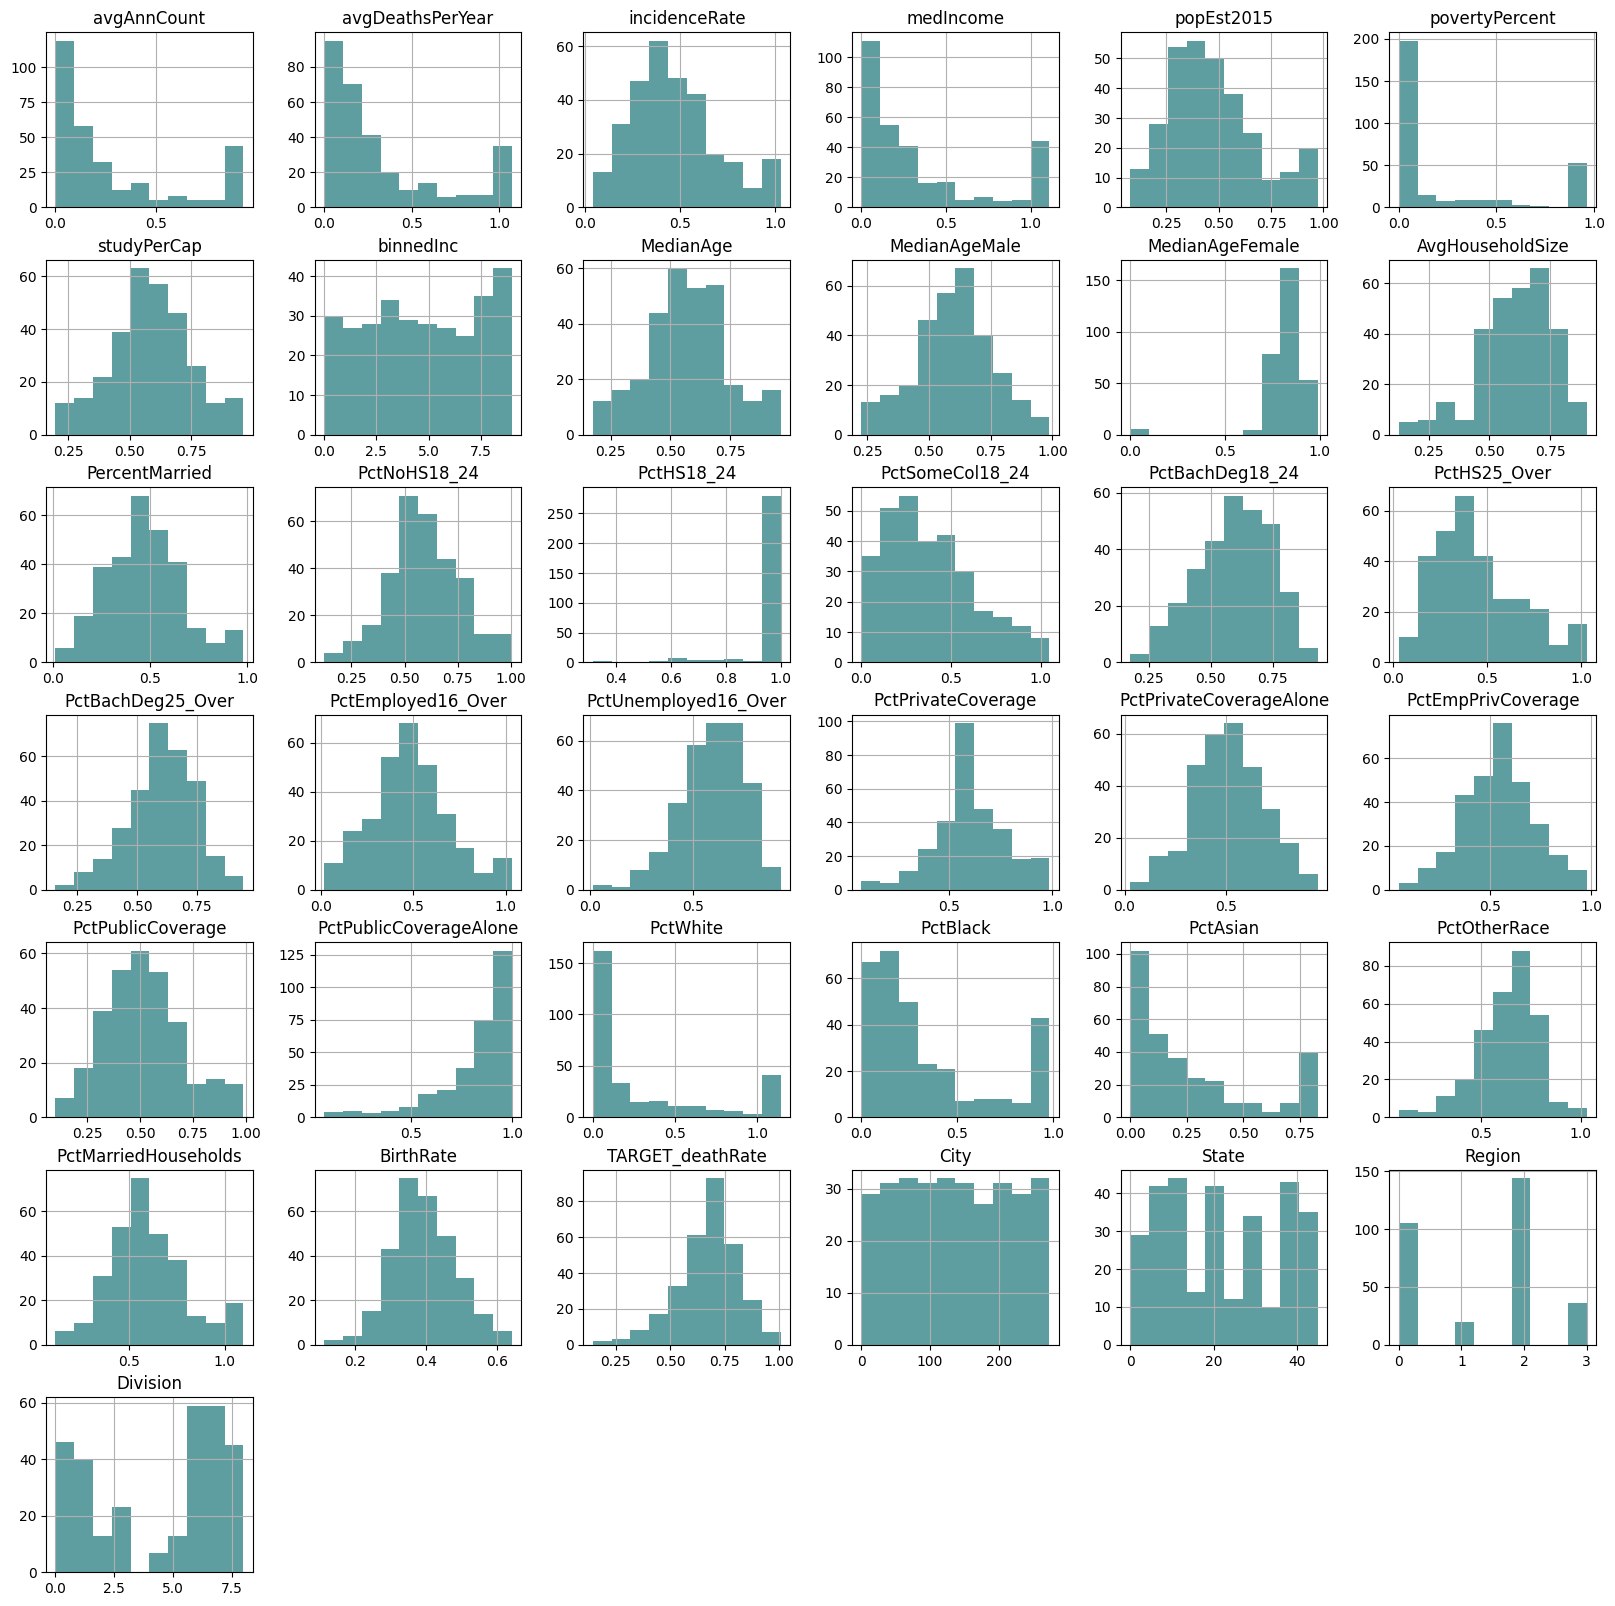

In [49]:
data_hist_plot = testset.hist(figsize = (20,20), color = "#5F9EA0")

In [50]:
trainset.to_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainvalset.csv")
testset.to_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/testset.csv")

In [51]:
# Importing train_test_split
X = trainset.drop(['TARGET_deathRate'], axis = 1)
y = trainset['TARGET_deathRate']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2467, 36), (275, 36), (2467,), (275,))

In [52]:
trainset = pd.merge(X_train, y_train, left_index=True, right_index=True)
valset = pd.merge(X_val, y_val, left_index=True, right_index=True)

In [53]:
trainset.to_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainset.csv")
testset.to_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/valset.csv")

In [54]:
trainset = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainset.csv", index_col = 0)
trainset.head(5)

avgAnnCount  avgDeathsPerYear  incidenceRate  \
Geography                                                                     
Greene County, North Carolina     0.083439          0.122371       0.291870   
McHenry County, Illinois          1.000000          1.000000       1.000000   
Wichita County, Kansas            1.000000          0.009178       0.614898   
Mineral County, Montana           0.024442          0.027533       0.275623   
Ohio County, West Virginia        0.254530          0.367113       0.350392   

                               medIncome  popEst2015  povertyPercent  \
Geography                                                              
Greene County, North Carolina   0.133236    0.846543             0.0   
McHenry County, Illinois        1.000000    0.124789             0.0   
Wichita County, Kansas          0.008714    0.279933             0.0   
Mineral County, Montana         0.022454    0.475548             0.0   
Ohio County, West Virginia      0.277148    0.512648             1.0   

                               studyPerCap  binnedInc  MedianAge  \
Geography                                                          
Greene County, North Carolina       0.5344          0   0.494915   
McHenry County, Illinois            0.5440          8   0.535593   
Wichita County, Kansas              0.4288          6   0.410169   
Mineral County, Montana             1.0000          0   1.000000   
Ohio County, West Virginia          0.6720          1   0.640678   

                               MedianAgeMale  ...  PctBlack  PctAsian  \
Geography                                     ...                       
Greene County, North Carolina       0.592934  ...  0.055978  1.000000   
McHenry County, Illinois            0.549923  ...  0.982636  0.522842   
Wichita County, Kansas              0.559140  ...  0.118496  0.574822   
Mineral County, Montana             0.872504  ...  0.061625  0.028026   
Ohio County, West Virginia          0.700461  ...  0.317203  0.057158   

                               PctOtherRace  PctMarriedHouseholds  BirthRate  \
Geography                                                                      
Greene County, North Carolina      0.478172              0.891040   0.407456   
McHenry County, Illinois           0.886624              0.457204   0.401518   
Wichita County, Kansas             0.788191              0.753252   0.388981   
Mineral County, Montana            0.543234              0.355567   0.425932   
Ohio County, West Virginia         0.455453              0.347449   0.411415   

                               City  State  Region  Division  TARGET_deathRate  
Geography                                                                       
Greene County, North Carolina   603     33       2         6          0.648195  
McHenry County, Illinois        948     13       0         0          0.739132  
Wichita County, Kansas         1614     16       0         7          0.682701  
Mineral County, Montana         984     26       3         3          0.913427  
Ohio County, West Virginia     1085     48       2         6          0.810853  

[5 rows x 37 columns]

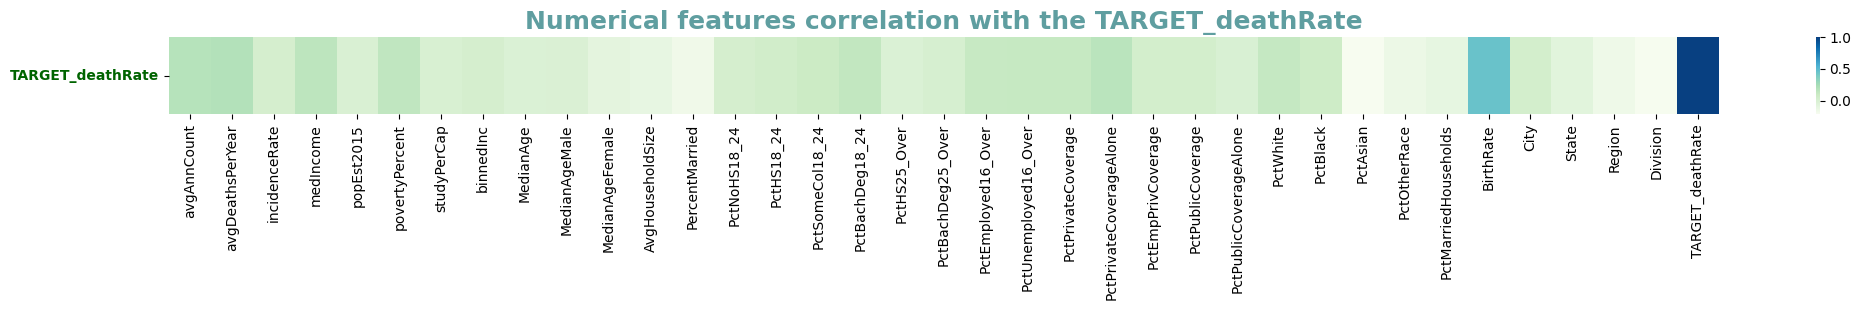

In [55]:
numeric_data = trainset.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["TARGET_deathRate"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the TARGET_deathRate", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [56]:
Num_feature = numeric_corr["TARGET_deathRate"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

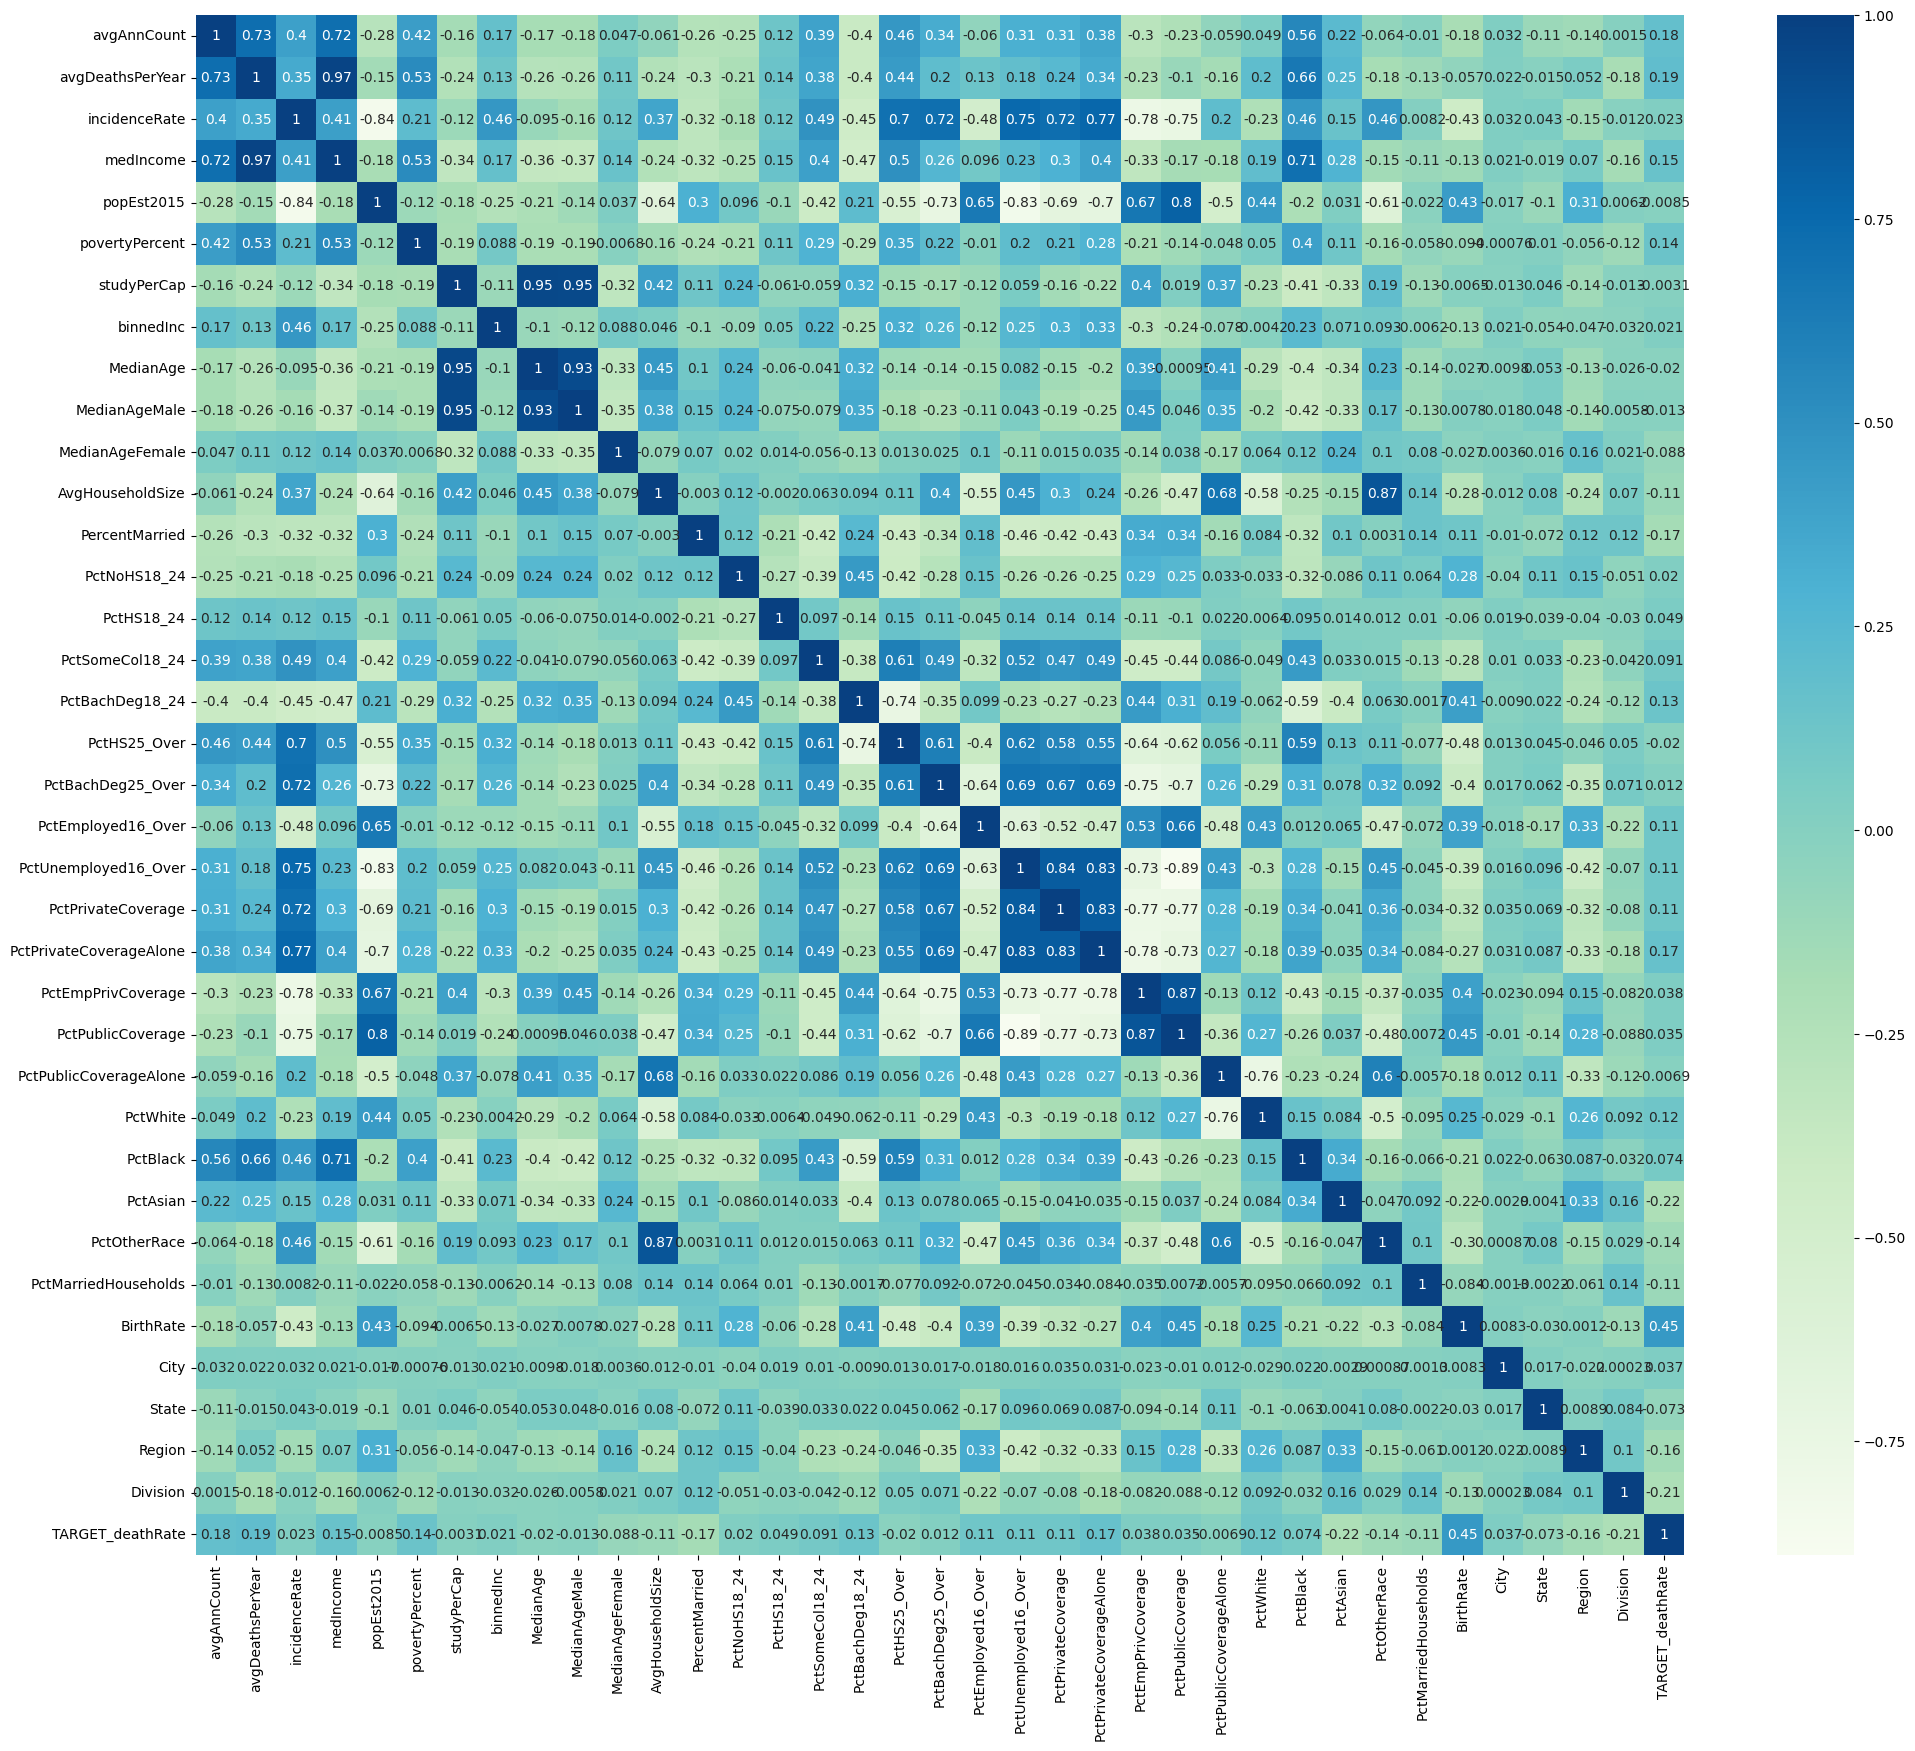

In [57]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(24,20))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(trainset.corr(), annot=True, cmap = "GnBu")  

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Importing train_test_split
X_train = trainset.drop(['TARGET_deathRate'], axis = 1)
y_train = trainset['TARGET_deathRate']

In [60]:
rfe = RFE(RandomForestRegressor())#, n_features_to_select=(len(trainset.columns) - 1)
fit = rfe.fit(X_train, y_train)

In [61]:
important_features = list()
for i in range(len(fit.support_)):
    if fit.support_[i]:
        important_features.append(i)
result = np.array(important_features)
calMostFeature = [0]*(len(trainset.columns) - 1)

In [62]:
fit.support_

array([ True,  True,  True,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True])

In [63]:
result

array([ 0,  1,  2,  3,  9, 11, 12, 13, 17, 18, 20, 22, 25, 28, 31, 33, 34,
       35])

In [64]:
for i in result:
  calMostFeature[i%(len(trainset.columns) - 1)] = calMostFeature[i%(len(trainset.columns) - 1)] + 1
print(calMostFeature)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]


In [65]:
NFeature = 0
for i in calMostFeature:
  if i != 0:
    NFeature = NFeature + 1
NFeature

18

In [66]:
top_idx =  np.sort(np.argsort(calMostFeature)[-NFeature:])
print(top_idx)

[ 0  1  2  3  9 11 12 13 17 18 20 22 25 28 31 33 34 35]


In [67]:
np.savetxt(f"/content/drive/My Drive/DataMining/POC/LungCancer/FeatureSelection/Transform/minmax_feature_selection.csv", top_idx, delimiter=",")

In [68]:
import pickle
rfe_filename = '/content/drive/My Drive/DataMining/POC/LungCancer/FeatureSelection/Transform/minmax_rfe.h5'
pickle.dump(fit, open(rfe_filename, 'wb'))